In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

## **Análise Exploratória**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/FIAP/Data Science/Challenge - 2º Ano/Notebooks/Arquivos/Resultado - Base2.csv')

In [4]:
df.head(5)

,CD_CLIENTE,Recencia,Frequencia,Monetario,R_Score,F_Score,M_Score,RFM_Score,Segmento
0,99069,788,4,6.516063e+02,3,2,2,322,Prestes a te largar
1,99958,3404,8,1.634142e+06,1,3,5,135,Clientes Regulares
2,99999,3217,2,8.407715e-03,1,1,1,111,Clientes Regulares
3,CARAMU,1142,2,8.531457e+04,2,1,5,215,Prestes a te largar
4,T00018,3622,6,2.031220e+02,1,2,2,122,Clientes Regulares


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10615 entries, 0 to 10614
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CD_CLIENTE  10615 non-null  object 
 1   Recencia    10615 non-null  int64  
 2   Frequencia  10615 non-null  int64  
 3   Monetario   10615 non-null  float64
 4   R_Score     10615 non-null  int64  
 5   F_Score     10615 non-null  int64  
 6   M_Score     10615 non-null  int64  
 7   RFM_Score   10615 non-null  int64  
 8   Segmento    10615 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 746.5+ KB


In [6]:
df.describe()

,Recencia,Frequencia,Monetario,R_Score,F_Score,M_Score,RFM_Score
count,10615.000000,10615.000000,1.061500e+04,10615.000000,10615.00000,10615.00000,10615.000000
mean,1210.325012,17.130382,5.069604e+04,3.000659,3.00000,3.00000,333.065944
std,1296.493879,24.609836,6.205855e+05,1.414713,1.41428,1.41428,148.892154
min,131.000000,1.000000,4.203857e-03,1.000000,1.00000,1.00000,111.000000
25%,305.000000,4.000000,2.669323e+02,2.000000,2.00000,2.00000,211.000000
50%,729.000000,9.000000,3.948061e+03,3.000000,3.00000,3.00000,332.000000
75%,1555.000000,21.000000,2.563412e+04,4.000000,4.00000,4.00000,453.000000
max,12758.000000,524.000000,3.999905e+07,5.000000,5.00000,5.00000,555.000000


## **Entendendo Comportamento dos Clusters**



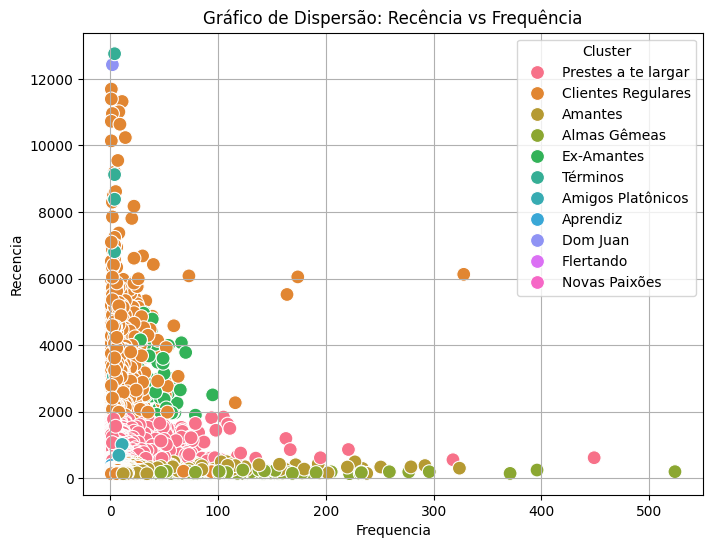

In [10]:
# Recencia vs. Frequência

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['Frequencia'], y=df['Recencia'], hue='Segmento', s=100)

plt.title('Gráfico de Dispersão: Recência vs Frequência')
plt.xlabel('Frequencia')
plt.ylabel('Recencia')
plt.legend(title='Cluster')

plt.grid(True)
plt.show()

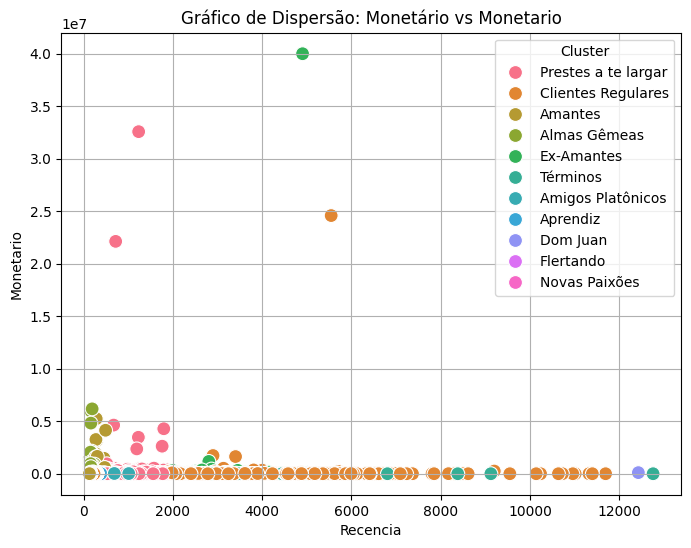

In [11]:
# Monetario vs. Recencia

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Recencia', y='Monetario', hue='Segmento', s=100)

plt.title('Gráfico de Dispersão: Monetário vs Monetario')
plt.xlabel('Recencia')
plt.ylabel('Monetario')
plt.legend(title='Cluster')

plt.grid(True)
plt.show()

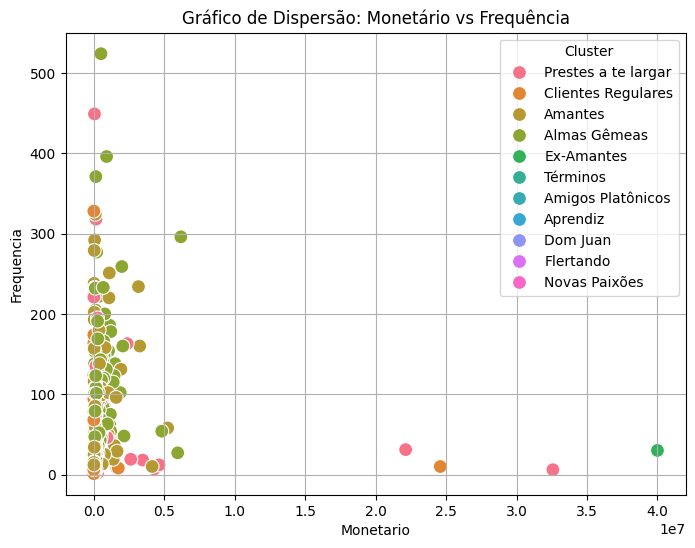

In [13]:
# Monetario vs. Frequência

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Monetario', y='Frequencia', hue='Segmento', s=100)

plt.title('Gráfico de Dispersão: Monetário vs Frequência')
plt.xlabel('Monetario')
plt.ylabel('Frequencia')
plt.legend(title='Cluster')

plt.grid(True)

plt.show()

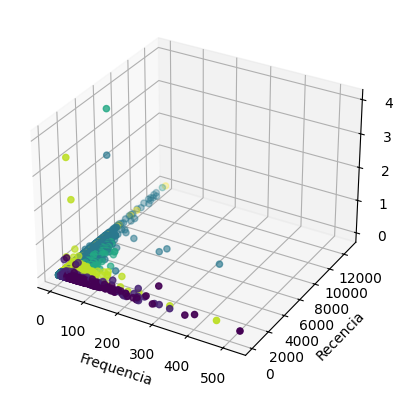

In [18]:
encoder = LabelEncoder()
categorias_codificadas = encoder.fit_transform(df['Segmento'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dispersão
ax.scatter3D(df['Frequencia'], df['Recencia'], df['Monetario'], c=categorias_codificadas, cmap='viridis')

ax.set_xlabel('Frequencia')
ax.set_ylabel('Recencia')
ax.set_zlabel('Monetario')

plt.show()

## **Dendograma**

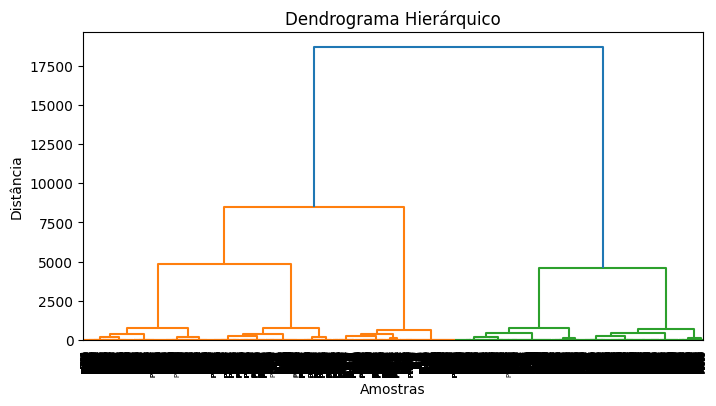

In [19]:
X = df['RFM_Score'].values.reshape(-1, 1)

linked = linkage(X, method='ward')  # Pode ser 'single', 'complete', 'average', 'ward'

# Plotando o dendrograma
plt.figure(figsize=(8, 4))
dendrogram(linked,
           orientation='top',
           labels=[f'P{i}' for i in range(len(X))],
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

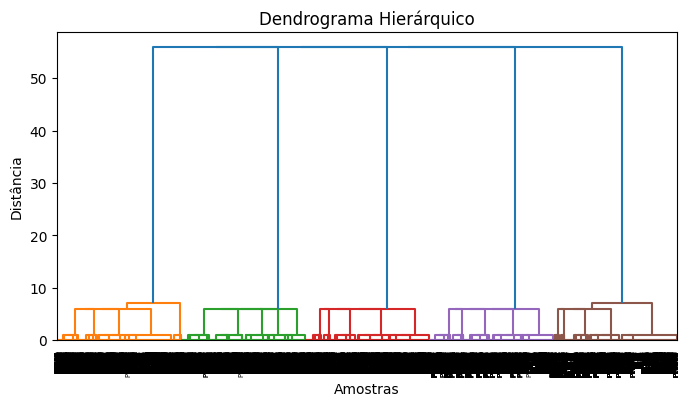

In [20]:
X = df['RFM_Score'].values.reshape(-1, 1)

linked = linkage(X, method='single')  # Pode ser 'single', 'complete', 'average', 'ward'

# Plotando o dendrograma
plt.figure(figsize=(8, 4))
dendrogram(linked,
           orientation='top',
           labels=[f'P{i}' for i in range(len(X))],
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

In [21]:
X = df[['R_Score', 'F_Score', 'M_Score']].values
X_scaled = StandardScaler().fit_transform(X)

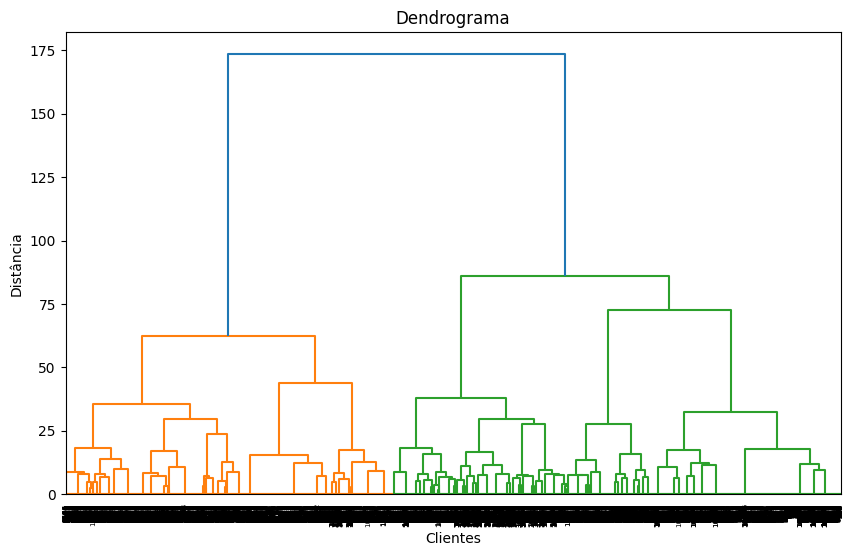

In [22]:
linked = linkage(X_scaled, method='ward')  # ou outro método: 'average', 'complete', etc.

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df.index.tolist())
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distância")
plt.show()

In [23]:
from scipy.cluster.hierarchy import fcluster

# Define número de clusters ou distância de corte
clusters = fcluster(linked, t=7, criterion='maxclust')  # 4 clusters
df['CLUSTER'] = clusters

In [24]:
df[['CLUSTER', 'Segmento']]

,CLUSTER,Segmento
0,1,Prestes a te largar
1,1,Clientes Regulares
2,2,Clientes Regulares
3,1,Prestes a te largar
4,1,Clientes Regulares
...,...,...
10610,7,Amantes
10611,3,Clientes Regulares
10612,5,Clientes Regulares
10613,5,Amantes


## **Os clusters estão muito agrupados, sem uma divisão aparente boa, ficando complicado a exploração para subclusters**

In [25]:
df = pd.read_csv('/content/drive/MyDrive/FIAP/Data Science/Challenge - 2º Ano/Notebooks/Arquivos/Resultado - Base2.csv')

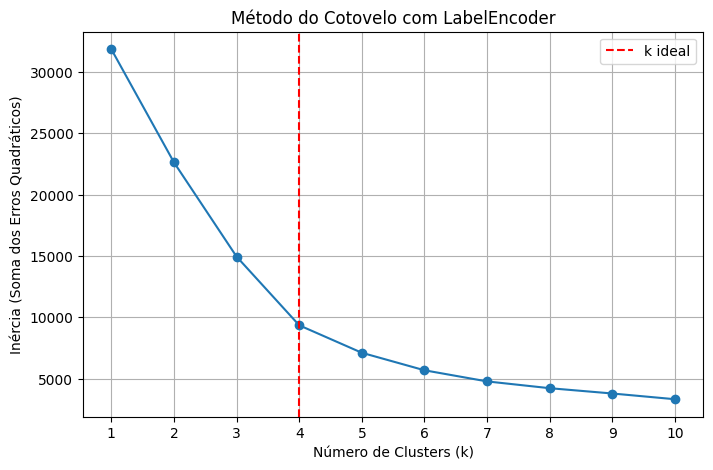

In [27]:
features = ['Frequencia', 'Monetario', 'Recencia']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.axvline(x=4, color='red', linestyle='--', label='k ideal')  # <- Linha que você pediu
plt.title('Método do Cotovelo com LabelEncoder')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

In [32]:
X = features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score para 4 clusters: {score:.4f}')

# PCA para visualização em 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Adicionar resultados ao dataframe
result = df.copy()
result['cluster'] = clusters
result['pca_x'] = X_pca[:, 0]
result['pca_y'] = X_pca[:, 1]

Silhouette Score para 4 clusters: 0.5749


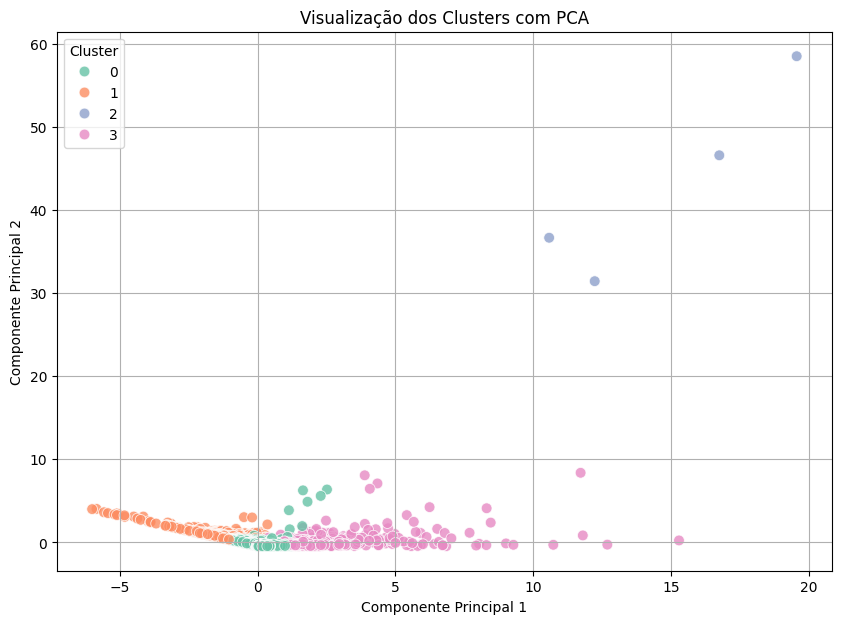

In [33]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=result,
    x='pca_x',
    y='pca_y',
    hue='cluster',
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [34]:
result.head(5)

,CD_CLIENTE,Recencia,Frequencia,Monetario,R_Score,F_Score,M_Score,RFM_Score,Segmento,cluster,pca_x,pca_y
0,99069,788,4,6.516063e+02,3,2,2,322,Prestes a te largar,0,-0.198599,-0.219722
1,99958,3404,8,1.634142e+06,1,3,5,135,Clientes Regulares,1,-0.493823,3.044249
2,99999,3217,2,8.407715e-03,1,1,1,111,Clientes Regulares,1,-1.433422,0.638203
3,CARAMU,1142,2,8.531457e+04,2,1,5,215,Prestes a te largar,0,-0.383113,0.026869
4,T00018,3622,6,2.031220e+02,1,2,2,122,Clientes Regulares,1,-1.514731,0.781284


In [35]:
cluster_0 = result[result['cluster'] == 0]
print(f'{cluster_0.describe()}')
print('\n\n ----------------------------------------------------------------------------------------- \n\n')
cluster_1 = result[result['cluster'] == 1]
print(f'{cluster_1.describe()}')
print('\n\n ----------------------------------------------------------------------------------------- \n\n')
cluster_2 = result[result['cluster'] == 2]
print(f'{cluster_2.describe()}')

          Recencia   Frequencia     Monetario      R_Score      F_Score  \
count  7954.000000  7954.000000  7.954000e+03  7954.000000  7954.000000   
mean    780.544506    12.067639  2.165658e+04     3.270807     2.896404   
std     554.147056    10.410907  1.092089e+05     1.195715     1.329271   
min     131.000000     1.000000  4.203857e-03     1.000000     1.000000   
25%     296.000000     4.000000  2.291081e+02     2.000000     2.000000   
50%     618.000000     8.000000  3.164103e+03     3.000000     3.000000   
75%    1201.000000    18.000000  1.881908e+04     4.000000     4.000000   
max    2263.000000    45.000000  4.632466e+06     5.000000     5.000000   

           M_Score    RFM_Score  cluster        pca_x        pca_y  
count  7954.000000  7954.000000   7954.0  7954.000000  7954.000000  
mean      2.876792   358.921549      0.0     0.047667    -0.193040  
std       1.355063   125.888078      0.0     0.473221     0.243213  
min       1.000000   111.000000      0.0    -0.9

In [36]:
eps=0.5
min_samples=5

X = features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, )
clusters = dbscan.fit_predict(X_scaled)

# Redução para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Retornar DataFrame com resultado
result = df.copy()
result['cluster'] = clusters
result['pca_x'] = X_pca[:, 0]
result['pca_y'] = X_pca[:, 1]

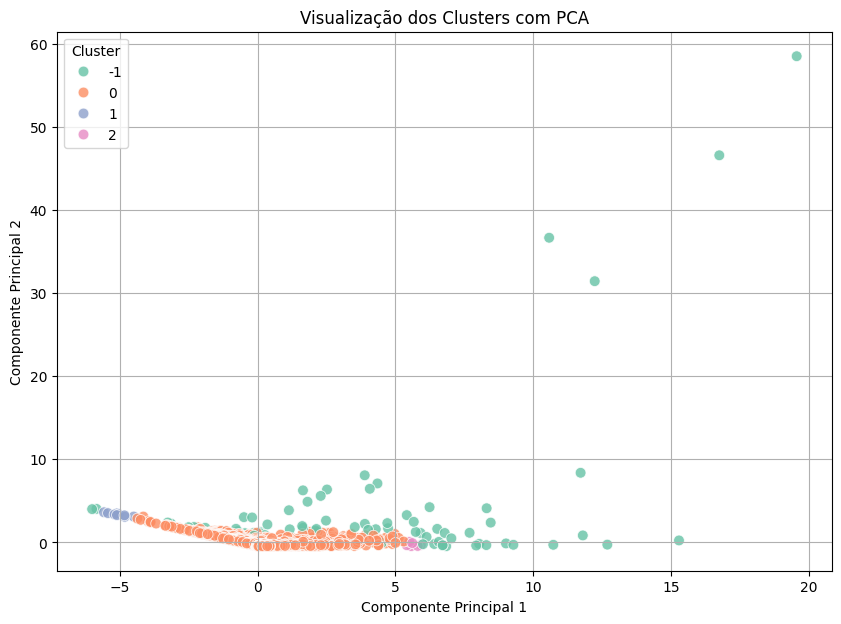

In [37]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=result,
    x='pca_x',
    y='pca_y',
    hue='cluster',
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()